In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("healthcare_dataset.csv")

In [4]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [5]:
data.shape

(10000, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [7]:
data.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [10]:
# TASK1: Create pie chart to represent the percentage distribution of each blood grp in the dataset

In [11]:
blood_group_counts = data['Blood Type'].value_counts()
blood_group_counts

Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

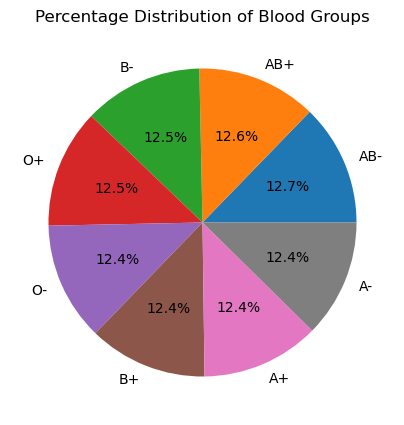

In [38]:
#Chart Plotting
plt.figure(figsize = (5, 5))
plt.pie(blood_group_counts, labels = blood_group_counts.index, autopct = '%1.1f%%')
plt.title('Percentage Distribution of Blood Groups')
plt.show()

OBSERVATION

AB- is the leading blood group

In [13]:
# TASK2: Generate a bar graph to highlight the top 10 regular customers based on relevant criteria in the dataset

In [14]:
#23_7_24

In [15]:
#Group by customer and calculate the total billing amount for each customer
customer_totals = data.groupby('Name')['Billing Amount'].sum()
customer_totals


Name
Aaron Burnett       7531.642746
Aaron Calderon     47555.486731
Aaron Coleman      46762.663205
Aaron Daugherty    30468.487108
Aaron Davis        17930.743019
                       ...     
Zachary Wood        7154.956700
Zachary Yates       5937.256092
Zoe Adkins DVM     13133.514334
Zoe Henderson      48451.386360
Zoe Moore          33779.910291
Name: Billing Amount, Length: 9378, dtype: float64

In [16]:
#Sort customers by total billing amount in descending order and select the top 10
top_10_customers = customer_totals.sort_values(ascending= False).head(10)
top_10_customers


Name
James Johnson        159668.261015
David Smith          150555.132774
Jennifer Gonzalez    145841.255531
Michael Martin       143754.162627
Amanda Lee           139550.700103
Elizabeth Jones      132198.952068
Michael Johnson      130228.254115
William Miller       128610.474939
Michael Smith        122494.615614
John Smith           119808.695213
Name: Billing Amount, dtype: float64

In [17]:
#Define a color Palette
colors = sns.color_palette("Pastel1")
colors

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

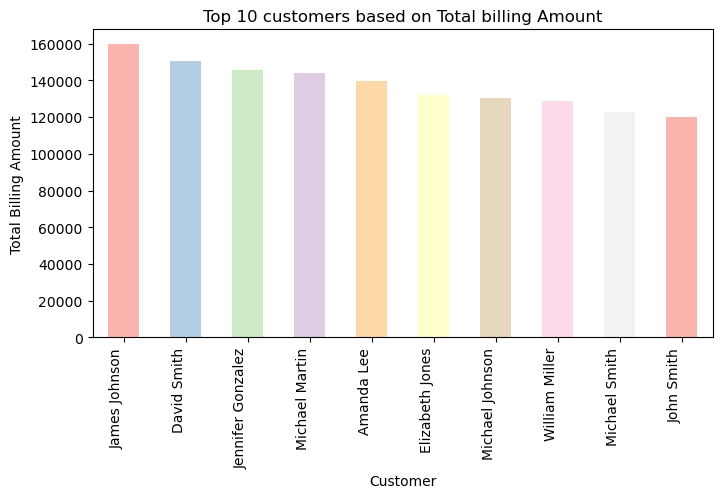

In [18]:
#Plotting the bar graph
plt.figure(figsize=(8, 4))
top_10_customers.plot(kind = 'bar', color = colors)
plt.title('Top 10 customers based on Total billing Amount')
plt.xlabel('Customer')
plt.ylabel('Total Billing Amount')
plt.xticks(rotation =90, ha='right')
plt.show()

OBSERVATION

James Johnson and David Smith have used more money at the hospital based on the billing amount paid

In [19]:
#TASK 3: Create pie charts to illustrate the percentage distribution of genders in the dataset

In [20]:
#Finding Gender Percentage
gender_counts = data['Gender'].value_counts()
gender_counts

Gender
Female    5075
Male      4925
Name: count, dtype: int64

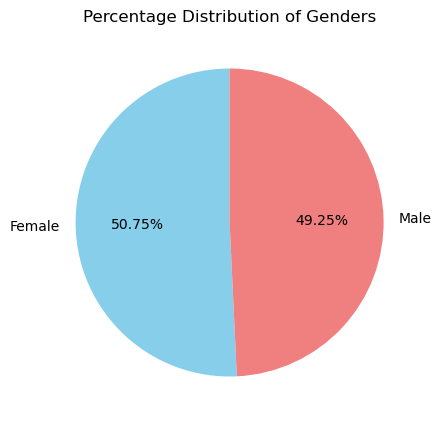

In [21]:
#Plotting pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.2f%%', startangle = 90, colors = ['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Genders')
plt.show()

OBSERVATION
 
The female gender dominates the hospital

In [22]:
#TASK 4: Generate a visualization ,possibly a histogram or another suitable chart, to present the distribution of age values in the dataset

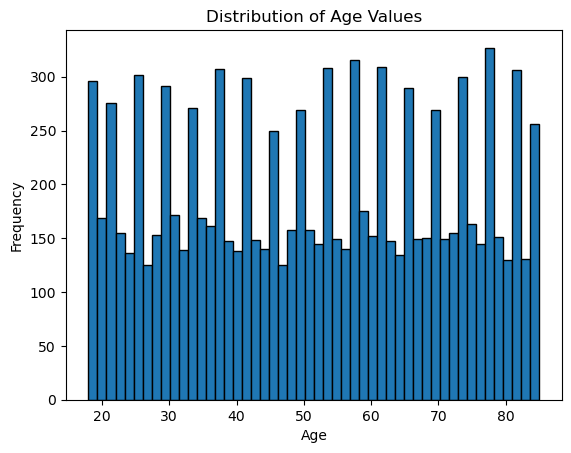

In [45]:
#6_8_24
plt.hist(data['Age'], bins = 50, edgecolor = 'black')

plt.title("Distribution of Age Values")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [23]:
#TASK 5: Generate chart to illustrate the medications used for various medical conditions in the dataset

In [24]:
#which medication used for different medical conditions
data.groupby('Medical Condition')['Medication'].value_counts().sort_values(ascending = False).unstack().style.background_gradient(cmap='GnBu_r')

Medication,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
Medical Condition,,,,,
Arthritis,322,320,318,324,366
Asthma,370,340,346,310,342
Cancer,291,352,350,346,364
Diabetes,335,301,326,327,334
Hypertension,328,335,356,323,346
Obesity,322,328,319,332,327


OBSERVATION

For arthritis conditions, penicilin medication is used , while for asthma, aspirin is prescribed

In [25]:
#TASK 6: Determine and visualize the day on which most patients are admitted using appropraite charts or graphs

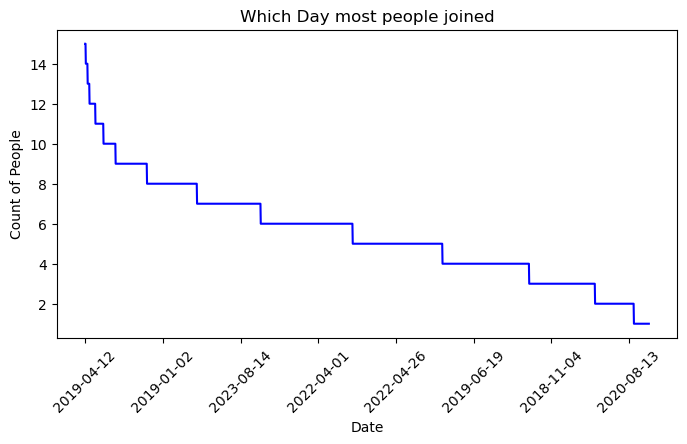

In [26]:
#Find which date most of the people joined
admission_counts = data['Date of Admission'].value_counts().sort_values(ascending = False)
admission_counts

#Plotting the bar graph
plt.figure(figsize=(8, 4))
admission_counts.plot(kind='line', color ='blue')
plt.title('Which Day most people joined')
plt.xlabel('Date')
plt.ylabel('Count of People')
plt.xticks(rotation = 45)
plt.show()

OBSERVATION

On April 12, 2019 , most patients joined hospitals

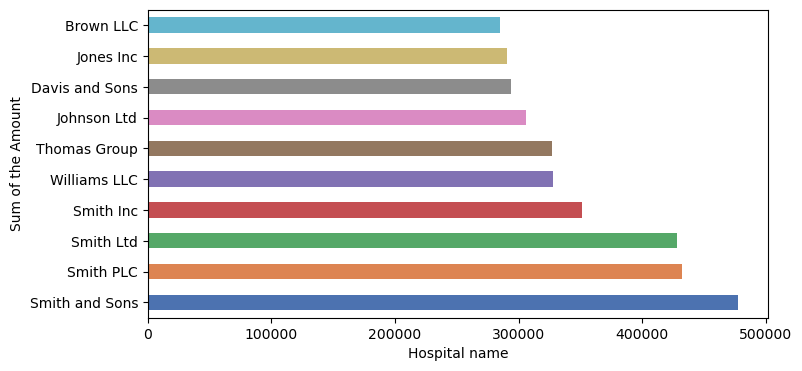

In [27]:
#TASK 7: identify and display the top 10 hospitals with the highest charges paid by patients
top_hospital = data.groupby('Hospital')['Billing Amount'].sum().sort_values(ascending = False).head(10)
colors = sns.color_palette("deep")

#plot the graph
plt.figure(figsize = (8, 4))
top_hospital.plot(kind = 'barh', color = colors)
plt.xlabel('Hospital name')
plt.ylabel('Sum of the Amount')
plt.show()

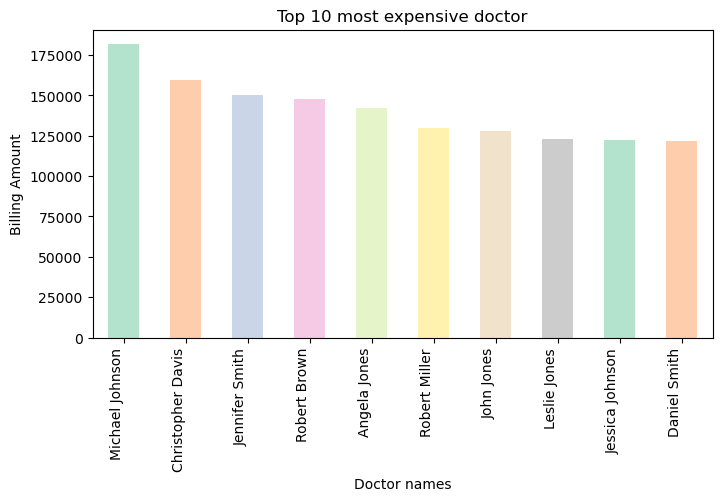

In [28]:
#TASK 8: determine the doctor who earns the most and visualize the information

top_earn = data.groupby('Doctor')['Billing Amount'].sum().sort_values(ascending = False).head(10)

colors = sns.color_palette('Pastel2')

#plot the graph

plt.figure(figsize= (8, 4))
top_earn.plot(kind= 'bar', color = colors)
plt.xlabel('Doctor names')
plt.ylabel('Billing Amount')
plt.title('Top 10 most expensive doctor')
plt.xticks(rotation= 90, ha = 'right')
plt.show()

In [29]:
#TASK 9: explore and analyze the the relationship between medical conditions and admission types, presenting the findings visually

data.groupby('Medical Condition')['Admission Type'].value_counts().sort_values(ascending = False).unstack().style.background_gradient(cmap='Reds')

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,569,529,552
Asthma,570,556,582
Cancer,555,578,570
Diabetes,528,557,538
Hypertension,515,578,595
Obesity,505,569,554


06_08_24

In [30]:
#The average amount for the gender with billing amount

data.groupby('Gender')['Billing Amount'].mean().sort_values(ascending = False)

Gender
Male      25550.215933
Female    25484.385085
Name: Billing Amount, dtype: float64

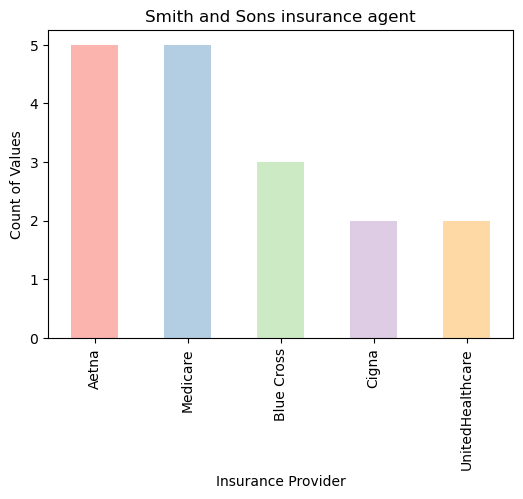

In [33]:
#find the smith and sons hospital insurance cover

insurance = data.groupby('Hospital')['Insurance Provider'].value_counts().loc['Smith and Sons']

colors = sns.color_palette('Pastel1')

#plot graph
plt.figure(figsize = (6, 4))
plt.title("Smith and Sons insurance agent")
plt.xlabel("Insurance Agent")
plt.ylabel("Count of Values")
insurance.plot(kind = 'bar', color = colors)
plt.show()

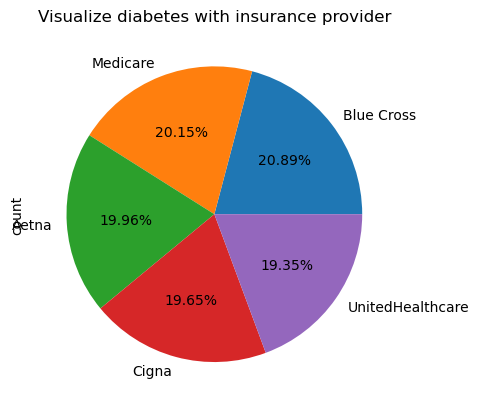

<Figure size 400x300 with 0 Axes>

In [36]:
#find which insurance are providing insurance for diabetes

diabetes = data[data['Medical Condition'] == 'Diabetes']['Insurance Provider'].value_counts()

colors = sns.color_palette('muted')

#Plot the graph
diabetes.plot(kind = 'pie', color = colors, labels = diabetes.index, autopct = '%1.2f%%')
plt.title('Visualize diabetes with insurance provider')
plt.figure(figsize = (4, 3))
plt.show()

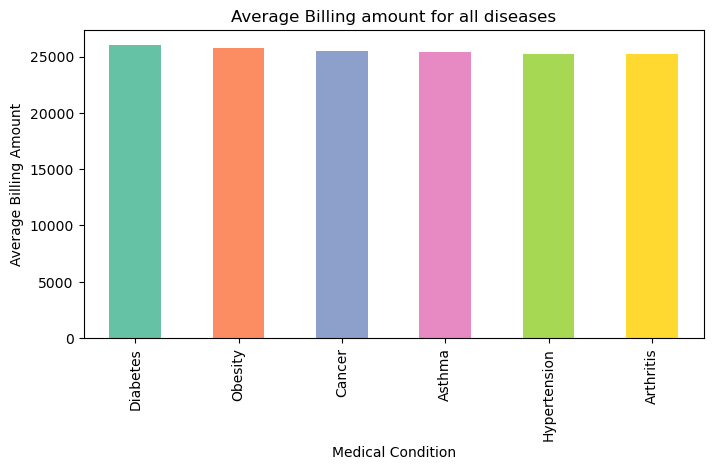

In [37]:
#find the average billing amount for each disease

disease = data.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending = False)

colors = sns.color_palette('Set2')

#plot the graph
plt.figure(figsize = (8, 4))
disease.plot(kind = 'bar', color = colors)
plt.xlabel('Medical Condition')
plt.ylabel('Average Billing Amount')
plt.title('Average Billing amount for all diseases')
plt.show()